# TASK 1: Prediction Using Supervised Machine Learning
**Author: Nikhil Bhatnagar**

**Problem Statement: What will be the predicted score if a student studies for 9.25 hrs/day?**

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset using pandas library**

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
print("Data is imported successfully!!!")
data

Data is imported successfully!!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

**Plotting the distribution of scores based on hours studied**

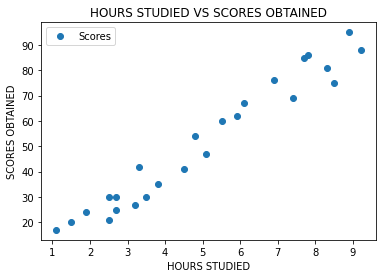

In [5]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('HOURS STUDIED VS SCORES OBTAINED')
plt.xlabel('HOURS STUDIED')
plt.ylabel('SCORES OBTAINED')
plt.show()

# Data Preparation
**We will now split the data into test data and train data using Scikit-Learn's train_test_split()method.
This will help us to apply Supervised ML algorithm to make predictions.**

In [6]:
x= data.iloc[:,:-1].values # Independent Variable
y= data.iloc[:,1].values   # Dependent Variable

#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size= 0.2)

# Linear Regression to Train the Algorithm
**Linear Regression is a supervised learning algorithm used to establish a relationship between dependent variable y and one or more independent varible x using best fit line**

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Training is completed!!!')

Training is completed!!!


**Now we will fit the regression line on the data and visualize it again**

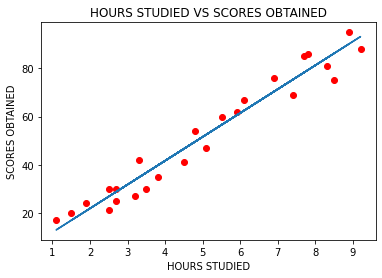

In [8]:
# y= mx+c
line = reg.coef_ *x + reg.intercept_
plt.scatter(x,y,color="red")
plt.plot(x,line)
plt.title('HOURS STUDIED VS SCORES OBTAINED')
plt.xlabel('HOURS STUDIED')
plt.ylabel('SCORES OBTAINED')
plt.show()

# Predictions 

In [9]:
#We will make predictions on test data
y_predict = reg.predict(x_test)
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

**Now we will compare the Actual and Predicted Data**

In [10]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
comparison

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be predicted score if a student studies for 9.25 hrs/day?

In [11]:
a=np.array(9.25)
my_hour = a.reshape(1, -1)
my_score = reg.predict(my_hour)
print('Hours Input: {}'.format(my_hour))
print('Predicted Score: {}'.format(my_score[0]))

Hours Input: [[9.25]]
Predicted Score: 93.69173248737538


# Model Evaluation
MAE, Mean Absolute Error is one of many metrics for summarizing and assessing the qualitty of ML model.

In [12]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test, y_predict))

MAE:  4.183859899002975


# Conclusion
**Hence, we can conclude that a low error value means the predicted values matched the real values.**
By using Linear Regression Algorithm on the model we successfully predict that he/she can score **93.69%** by studying for **9.25 hrs/day** which is an excellent score.
